In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

## Understanding the data

In [6]:
def convert_to_date(x):
    return datetime.strptime(x, '%Y %m %d')

In [7]:
df=pd.read_csv('train.csv',parse_dates=[['year','month','day']],date_parser=convert_to_date,keep_date_col=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20168\806384470.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df=pd.read_csv('train.csv',parse_dates=[['year','month','day']],date_parser=convert_to_date,keep_date_col=True)


In [8]:
df.head()

,year_month_day,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,1992-12-13,1992,12,13,-4.99,156.0,4.8,-2.8,78.5,28.98,30.06
1,1989-05-14,1989,5,14,0.00,-110.1,-2.5,2.4,NaN,24.95,25.23
2,1993-06-28,1993,6,28,2.04,-110.2,-4.5,5.9,NaN,25.78,27.84
3,1995-01-08,1995,1,8,1.98,-140.0,-7.7,1.2,82.6,26.47,26.86
4,1995-02-21,1995,2,21,5.01,-170.0,-5.4,-6.6,75.2,28.83,28.90


In [9]:
df.describe()

,year_month_day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
count,104409,104409.000000,104409.000000,89839.000000,89839.000000,65615.000000,96571.000000,104409.000000
mean,1993-03-25 04:20:57.408843904,0.559597,-53.070046,-3.505847,0.451069,81.245035,26.689702,27.535275
min,1980-03-08 00:00:00,-8.810000,-180.000000,-12.400000,-10.800000,54.000000,17.050000,17.340000
25%,1991-12-01 00:00:00,-2.010000,-140.200000,-5.900000,-1.500000,77.600000,25.750000,26.450000
50%,1993-11-16 00:00:00,0.010000,-110.200000,-4.200000,0.400000,81.200000,27.160000,28.080000
75%,1995-06-12 00:00:00,4.990000,147.000000,-1.800000,2.400000,84.800000,28.060000,29.190000
max,1996-12-31 00:00:00,9.050000,171.100000,12.500000,11.000000,99.900000,31.480000,31.270000
std,NaN,4.586084,134.416226,3.222261,2.927329,5.371216,1.905292,2.167564


In [12]:
df.corr()

,year_month_day,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
year_month_day,1.000000,0.995176,0.048525,0.006929,-0.002313,-0.014011,-0.040379,-0.170241,-0.064860,0.198425,0.209926
year,0.995176,1.000000,-0.049355,-0.002275,-0.002274,-0.013361,-0.045173,-0.192424,-0.037977,0.212008,0.219676
month,0.048525,-0.049355,1.000000,0.010564,-0.000169,-0.006366,0.048058,0.225312,-0.140442,-0.137345,-0.098703
day,0.006929,-0.002275,0.010564,1.000000,-0.002158,-0.002984,0.009165,0.003823,-0.004931,-0.005773,-0.003908
latitude,-0.002313,-0.002274,-0.000169,-0.002158,1.000000,0.039898,0.127751,0.002152,0.169732,0.070133,0.127508
longitude,-0.014011,-0.013361,-0.006366,-0.002984,0.039898,1.000000,0.419216,-0.118610,-0.039895,0.350036,0.425969
zon.winds,-0.040379,-0.045173,0.048058,0.009165,0.127751,0.419216,1.000000,0.071219,0.062317,0.210095,0.342753
mer.winds,-0.170241,-0.192424,0.225312,0.003823,0.002152,-0.118610,0.071219,1.000000,0.120932,-0.385561,-0.334296
humidity,-0.064860,-0.037977,-0.140442,-0.004931,0.169732,-0.039895,0.062317,0.120932,1.000000,-0.409888,-0.355206
air temp.,0.198425,0.212008,-0.137345,-0.005773,0.070133,0.350036,0.210095,-0.385561,-0.409888,1.000000,0.949209


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104409 entries, 0 to 104408
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   year_month_day  104409 non-null  datetime64[ns]
 1   year            104409 non-null  object        
 2   month           104409 non-null  object        
 3   day             104409 non-null  object        
 4   latitude        104409 non-null  float64       
 5   longitude       104409 non-null  float64       
 6   zon.winds       89839 non-null   float64       
 7   mer.winds       89839 non-null   float64       
 8   humidity        65615 non-null   float64       
 9   air temp.       96571 non-null   float64       
 10  s.s.temp.       104409 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 8.8+ MB


## Data Visualisation

### LinePlot

<Axes: xlabel='year_month_day', ylabel='s.s.temp.'>

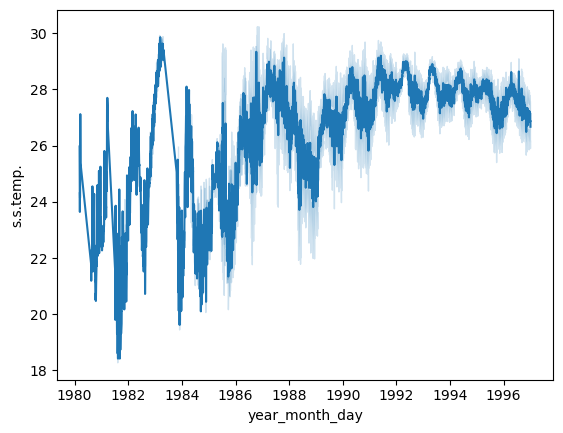

In [21]:
sns.lineplot(data=df,x=df['year_month_day'],y=df['s.s.temp.'])

<Axes: xlabel='year_month_day', ylabel='air temp.'>

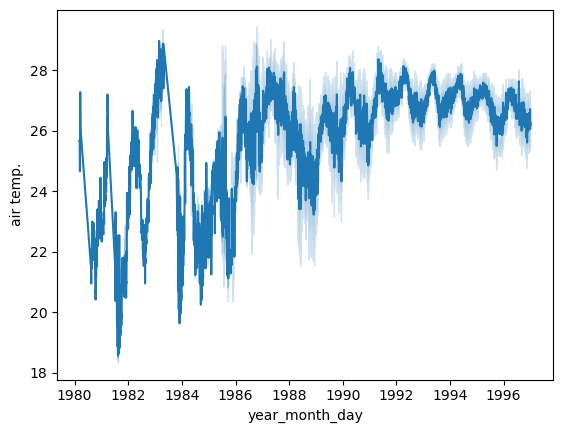

In [22]:
sns.lineplot(data=df,x=df['year_month_day'],y=df['air temp.'])

<Axes: xlabel='year_month_day', ylabel='humidity'>

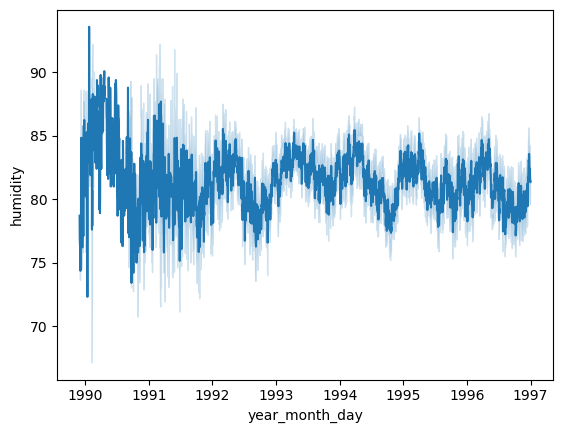

In [23]:
sns.lineplot(data=df,x=df['year_month_day'],y=df['humidity'])

<Axes: xlabel='year_month_day', ylabel='mer.winds'>

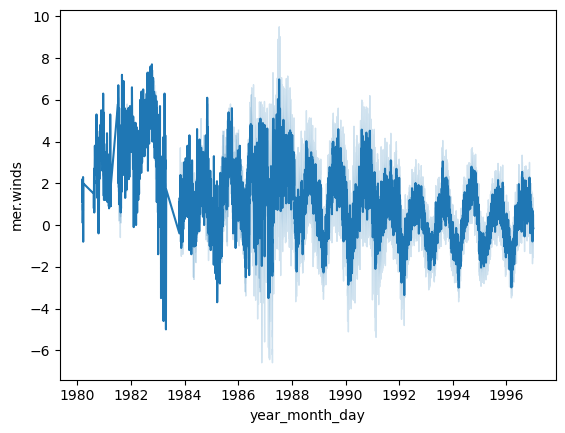

In [24]:
sns.lineplot(data=df,x=df['year_month_day'],y=df['mer.winds'])

<Axes: xlabel='year_month_day', ylabel='zon.winds'>

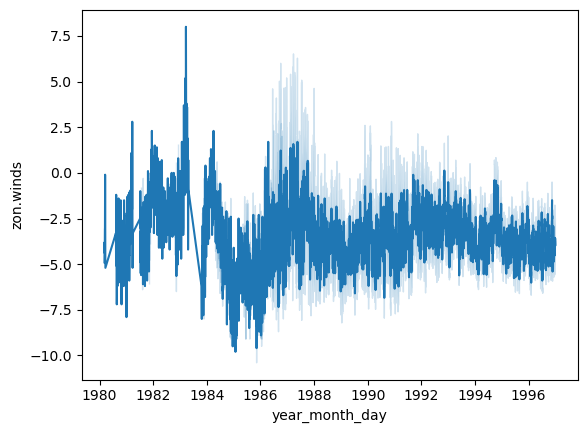

In [25]:
sns.lineplot(data=df,x=df['year_month_day'],y=df['zon.winds'])

### Histplots

<Axes: xlabel='latitude', ylabel='Count'>

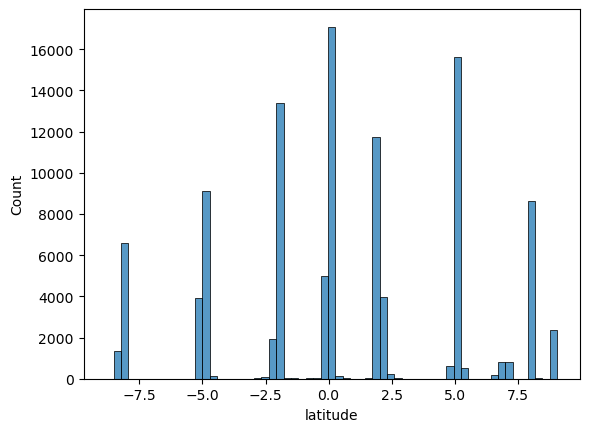

In [27]:
sns.histplot(df['latitude'])

<Axes: xlabel='longitude', ylabel='Count'>

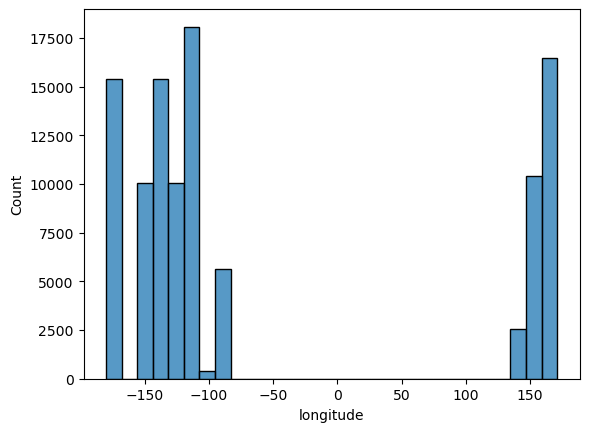

In [28]:
sns.histplot(df['longitude'])

<Axes: xlabel='zon.winds', ylabel='Count'>

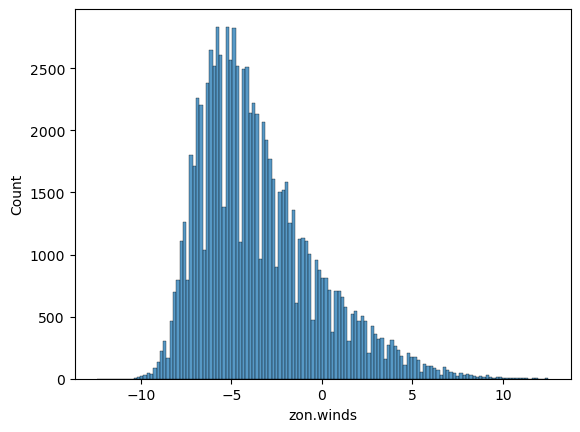

In [29]:
sns.histplot(df['zon.winds'])

<Axes: xlabel='mer.winds', ylabel='Count'>

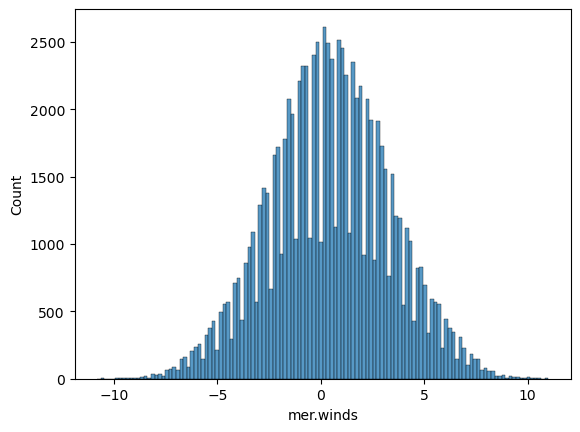

In [30]:
sns.histplot(df['mer.winds'])

<Axes: xlabel='humidity', ylabel='Count'>

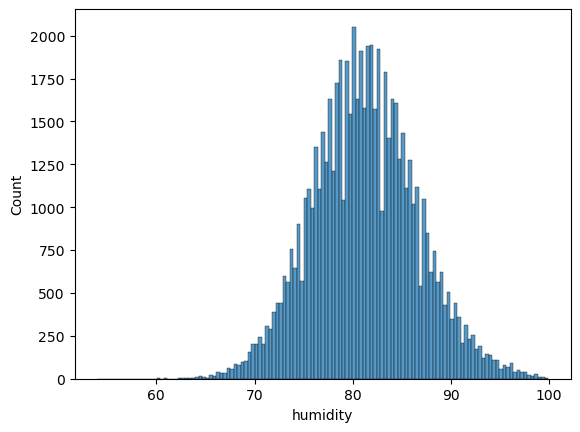

In [31]:
sns.histplot(df['humidity'])

<Axes: xlabel='air temp.', ylabel='Count'>

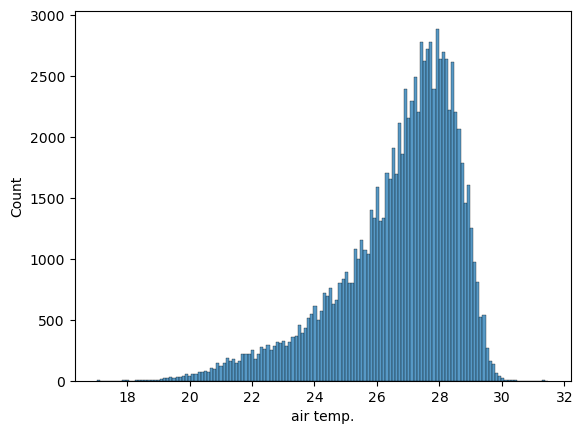

In [32]:
sns.histplot(df['air temp.'])

<Axes: xlabel='s.s.temp.', ylabel='Count'>

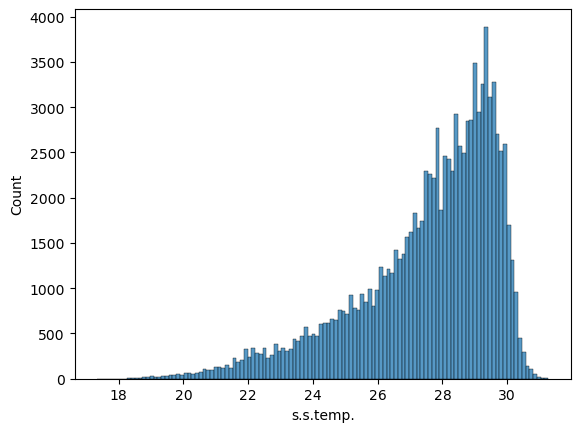

In [33]:
sns.histplot(df['s.s.temp.'])

### Boxplot

<Axes: >

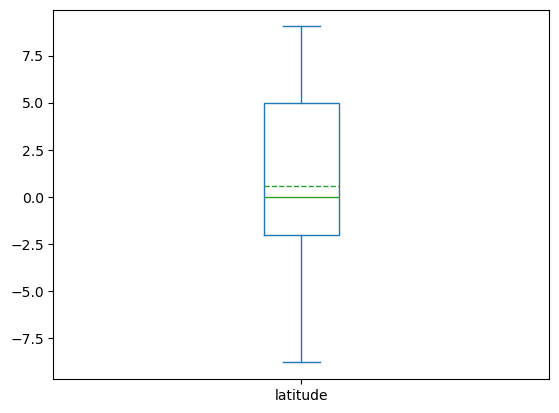

In [35]:
df['latitude'].plot.box(showfliers=True,meanline=True, showmeans = True)

<Axes: >

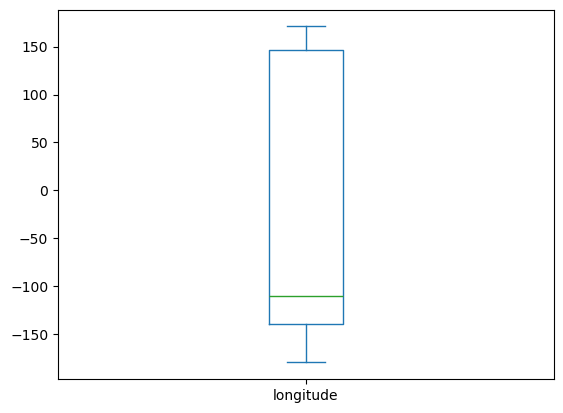

In [36]:
df['longitude'].plot.box()

<Axes: >

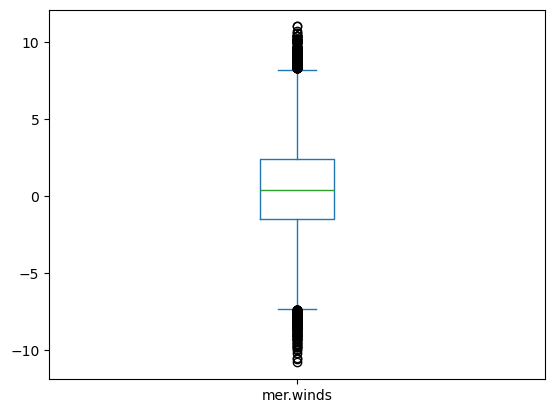

In [37]:
df['mer.winds'].plot.box()

<Axes: >

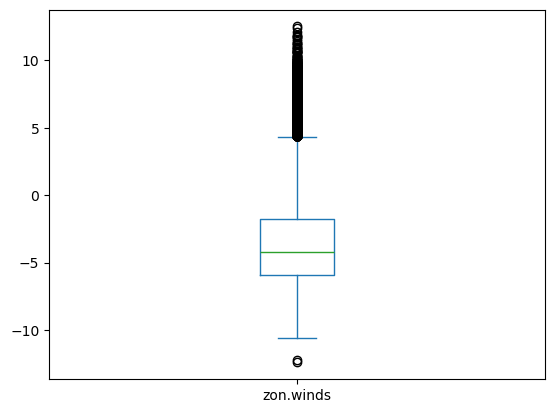

In [38]:
df['zon.winds'].plot.box()

<Axes: >

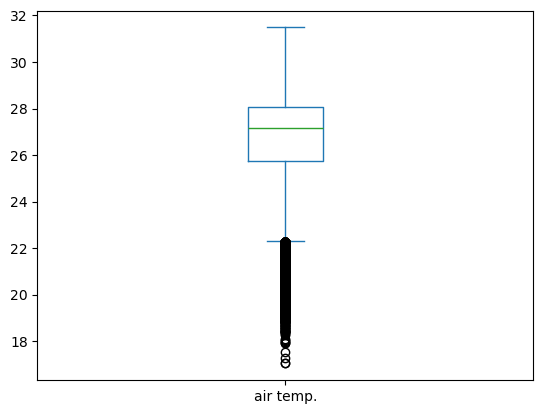

In [39]:
df['air temp.'].plot.box()

<Axes: >

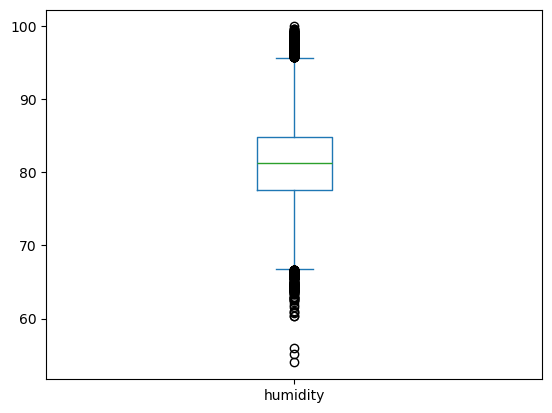

In [40]:
df['humidity'].plot.box()

## Handling the Distribution of data

<Axes: xlabel='air temp.', ylabel='Count'>

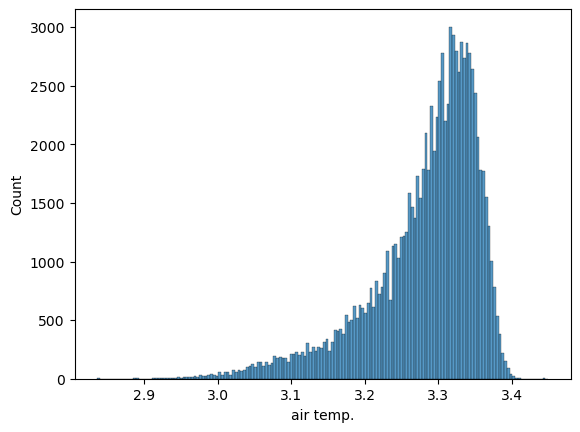

In [62]:
sns.histplot(np.log(df['air temp.']))

<Axes: xlabel='s.s.temp.', ylabel='Count'>

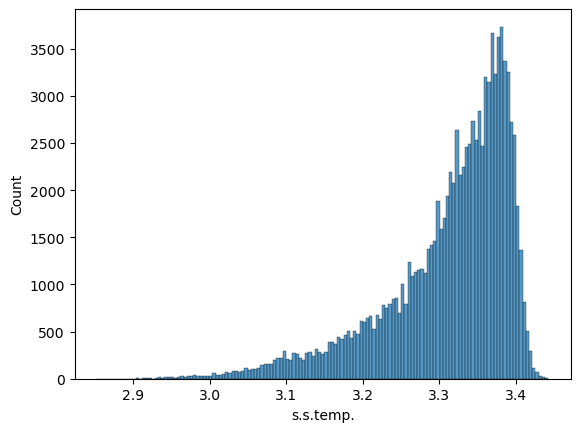

In [64]:
sns.histplot(np.log(df['s.s.temp.']))